# Deep Learning - Autoencoder

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
# Set parameters
image_length = 784
encoding_dim = 200
encoding_dim_2 = 45

train_size = 5000
validation_size = 5000

In [3]:
# Import and convert data to percentage points (divide by 255, the max gray scale value)
x_train = pd.read_csv("data/mnist_train.csv", header = None)
y_train = x_train.loc[:, 0].to_numpy()
x_train = x_train.loc[:, 1:].to_numpy()
x_train = x_train.astype('float32') / 255.

x_test = pd.read_csv("data/mnist_test.csv", header = None)
y_test = x_test.loc[:, 0].to_numpy()
x_test = x_test.loc[:, 1:].to_numpy()
x_test = x_test.astype('float32') / 255.

# Take samples for training and testing. Note that we cannot take the test set yet, as we will use this when the
# full network is completed in R
x_validation = x_train[train_size:(train_size+validation_size), :]
x_train_input = x_train[(train_size+validation_size):, :]
x_train = x_train[:train_size, :]
y_train_input = y_train[(train_size+validation_size):]
y_validation = y_train[train_size:(train_size+validation_size)]

# Create one-hot-encoded versions of the data
y_train_input_ohe = to_categorical(y_train_input)
y_validation_ohe = to_categorical(y_validation)
y_test_ohe = to_categorical(y_test)

In [4]:
# Create autoencoder with topology 784 -> 200 -> 45
input_img = Input(shape = (image_length,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(encoding_dim_2, activation='relu')(encoded)

decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(image_length, activation='sigmoid')(decoded)

encoder = Model(input_img, encoded)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# Grid Search - after finding epochs=12 and batch_size=128 was the best
best_acc = 0

for epoch in range(12, 20):
    print(f"Epochs: {epoch}")
    for batch_size in [64, 128]:
        print(f"Batch size: {batch_size}")
        
        autoencoder = Model(input_img, decoded)
        autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        history = autoencoder.fit(x_train, x_train,
                          epochs=epoch, batch_size=batch_size,
                          shuffle=True, verbose = 0,
                          validation_data=(x_validation, x_validation))
        
        if (history.history['loss'][-1] > history.history['val_loss'][-1]):
            print("Overfitting!")
            next
            
        validation_acc = history.history['val_acc'][-1]
        
        if (validation_acc > best_acc):
            best_acc = validation_acc
            best_epoch = epoch
            best_batch_size = batch_size
            
print(f"Best accuracy: {best_acc}, best epochs: {best_epoch}, best batch_size: {best_batch_size}")

Epochs: 12
Batch size: 64
Instructions for updating:
Use tf.cast instead.
Batch size: 128
Epochs: 13
Batch size: 64
Batch size: 128
Epochs: 14
Batch size: 64
Batch size: 128
Epochs: 15
Batch size: 64
Batch size: 128
Epochs: 16
Batch size: 64
Batch size: 128
Epochs: 17
Batch size: 64
Batch size: 128
Epochs: 18
Batch size: 64
Batch size: 128
Epochs: 19
Batch size: 64
Batch size: 128
Best accuracy: 0.8135267805099488, best epochs: 17, best batch_size: 128


In [6]:
# Use best parameters found above
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
history = autoencoder.fit(x_train, x_train,
                          epochs=best_epoch, batch_size=best_batch_size,
                          shuffle=True, verbose = 2,
                          validation_data=(x_validation, x_validation))

Train on 5000 samples, validate on 5000 samples
Epoch 1/17
 - 4s - loss: 0.0740 - acc: 0.8153 - val_loss: 0.0832 - val_acc: 0.8134
Epoch 2/17
 - 1s - loss: 0.0714 - acc: 0.8154 - val_loss: 0.0832 - val_acc: 0.8134
Epoch 3/17
 - 1s - loss: 0.0714 - acc: 0.8154 - val_loss: 0.0833 - val_acc: 0.8134
Epoch 4/17
 - 1s - loss: 0.0716 - acc: 0.8154 - val_loss: 0.0836 - val_acc: 0.8135
Epoch 5/17
 - 1s - loss: 0.0715 - acc: 0.8154 - val_loss: 0.0840 - val_acc: 0.8134
Epoch 6/17
 - 1s - loss: 0.0717 - acc: 0.8154 - val_loss: 0.0836 - val_acc: 0.8134
Epoch 7/17
 - 1s - loss: 0.0716 - acc: 0.8154 - val_loss: 0.0836 - val_acc: 0.8134
Epoch 8/17
 - 1s - loss: 0.0716 - acc: 0.8154 - val_loss: 0.0835 - val_acc: 0.8134
Epoch 9/17
 - 1s - loss: 0.0716 - acc: 0.8154 - val_loss: 0.0837 - val_acc: 0.8134
Epoch 10/17
 - 1s - loss: 0.0717 - acc: 0.8154 - val_loss: 0.0837 - val_acc: 0.8134
Epoch 11/17
 - 1s - loss: 0.0716 - acc: 0.8154 - val_loss: 0.0836 - val_acc: 0.8134
Epoch 12/17
 - 1s - loss: 0.0716 - ac

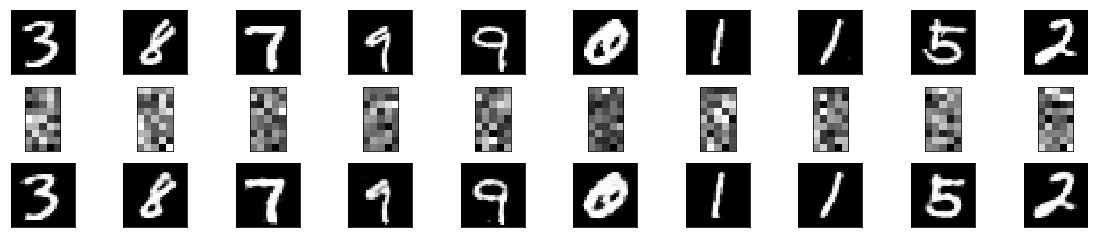

In [7]:
# Plot images
encoded_images = encoder.predict(x_train_input)
decoded_images = autoencoder.predict(x_train_input)

plt.figure(figsize=(40, 4))
for i in range(10):
    # Display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_train_input[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_images[i].reshape(9,5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display decoded images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [8]:
# Now that the autoencoding part is done, we add the ANN part from exercise 4
full_model = Model(autoencoder.input, autoencoder.layers[-3].output)
full_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 45)                9045      
Total params: 166,045
Trainable params: 166,045
Non-trainable params: 0
_________________________________________________________________


In [10]:
H = 20 # H = 20 from exercise 4

layer_1 = Dense(H, activation='relu')(full_model.layers[-1].output)
layer_2 = Dense(10, activation = 'softmax')(layer_1)
full_model = Model(input_img, layer_2)
full_model.summary()
full_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 45)                9045      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                920       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
Total params: 167,175
Trainable params: 167,175
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = full_model.fit(x_train_input, y_train_input_ohe,
                         epochs=best_epoch, batch_size=best_batch_size,
                         shuffle=True, verbose=2,
                         validation_data=(x_validation, y_validation_ohe))

Train on 50000 samples, validate on 10000 samples
Epoch 1/17
 - 6s - loss: 0.0132 - acc: 0.9957 - val_loss: 0.0178 - val_acc: 0.9941
Epoch 2/17
 - 7s - loss: 0.0110 - acc: 0.9965 - val_loss: 0.0181 - val_acc: 0.9938
Epoch 3/17
 - 7s - loss: 0.0096 - acc: 0.9970 - val_loss: 0.0167 - val_acc: 0.9947
Epoch 4/17
 - 6s - loss: 0.0079 - acc: 0.9974 - val_loss: 0.0162 - val_acc: 0.9948
Epoch 5/17
 - 5s - loss: 0.0065 - acc: 0.9980 - val_loss: 0.0203 - val_acc: 0.9940
Epoch 6/17
 - 5s - loss: 0.0059 - acc: 0.9982 - val_loss: 0.0178 - val_acc: 0.9945
Epoch 7/17
 - 5s - loss: 0.0052 - acc: 0.9984 - val_loss: 0.0158 - val_acc: 0.9950
Epoch 8/17
 - 5s - loss: 0.0043 - acc: 0.9986 - val_loss: 0.0165 - val_acc: 0.9952
Epoch 9/17
 - 5s - loss: 0.0041 - acc: 0.9987 - val_loss: 0.0174 - val_acc: 0.9949
Epoch 10/17
 - 6s - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0181 - val_acc: 0.9951
Epoch 11/17
 - 6s - loss: 0.0026 - acc: 0.9993 - val_loss: 0.0193 - val_acc: 0.9948
Epoch 12/17
 - 6s - loss: 0.0027 - 

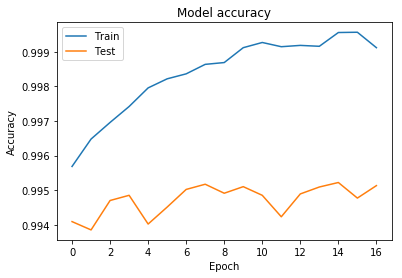

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

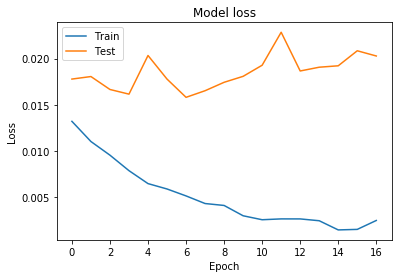

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
evals = full_model.evaluate(x_test, y_test_ohe)
print(f"Accuracy on the test set: {evals[1]}")

10000/10000 [==============================] - 1s 99us/step
Accuracy on the test set: 0.9951299982070922
